In [1]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
rating_data = pd.read_csv('./movie_lens/ratings.csv')
movie_data = pd.read_csv('./movie_lens/movies.csv')

In [5]:
rating_data.head()
movie_data.head()
print(movie_data.shape)
print(rating_data.shape)
# 전처리
rating_data.drop('timestamp', axis=1, inplace=True)
rating_data.head()
movie_data.drop('genres', axis=1, inplace=True)
movie_data.head()
user_movie_data = pd.merge(rating_data, movie_data, on='movieId')
user_movie_data.head()

(9125, 3)
(100004, 4)


,userId,movieId,rating,title
0,1,31,2.5,Dangerous Minds (1995)
1,7,31,3.0,Dangerous Minds (1995)
2,31,31,4.0,Dangerous Minds (1995)
3,32,31,4.0,Dangerous Minds (1995)
4,36,31,3.0,Dangerous Minds (1995)


In [6]:
user_movie_rating = user_movie_data.pivot_table('rating', index='userId', columns='title').fillna(0)
user_movie_rating.shape
user_movie_rating.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
movie_user_rating = user_movie_rating.values.T
movie_user_rating

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(movie_user_rating)
matrix.shape

(9064, 12)

In [9]:
matrix

array([[ 1.22749118e-02,  2.50765776e-03,  1.55472787e-02, ...,
        -2.21329182e-02,  1.08525866e-02, -7.97264368e-03],
       [ 4.23038324e-01, -6.91488803e-03, -4.06782950e-01, ...,
         1.78451321e-02, -5.18210246e-01, -2.71209201e-01],
       [ 1.66327790e-01,  1.08318350e-01,  6.02970999e-02, ...,
         2.16236789e-01,  7.77073926e-02, -1.75426144e-03],
       ...,
       [ 8.51772029e+00, -3.31479095e+00,  9.03662066e-01, ...,
        -1.47166367e-01,  6.83910737e-01,  2.25326446e+00],
       [ 3.19207068e-01,  3.05401295e-01, -5.41681105e-01, ...,
        -5.18904364e-02, -6.05168138e-01, -1.65795415e-01],
       [ 1.04837791e-01,  2.96769928e-01, -2.18217892e-01, ...,
        -1.89542976e-01,  1.10783992e-01,  1.17228312e-01]])

(9064, 9064)
(200, 200)


<AxesSubplot:>

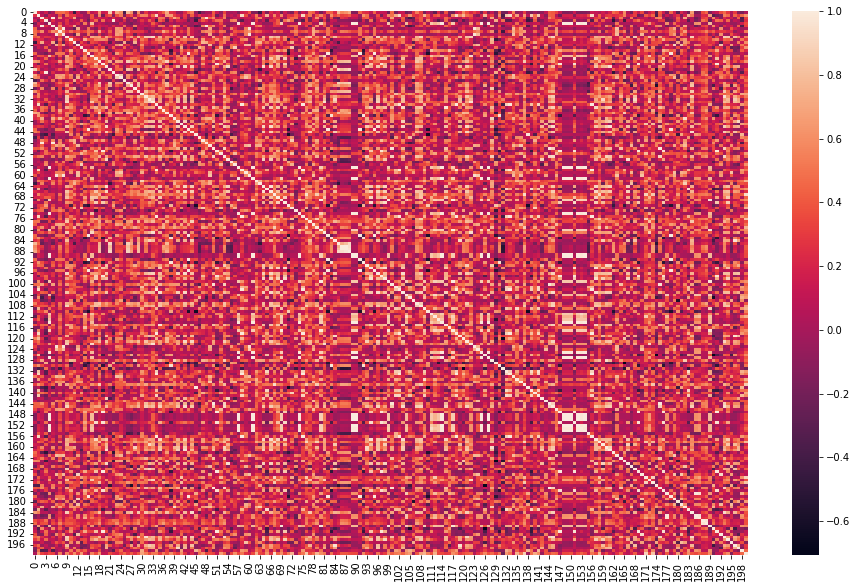

In [11]:
corr = np.corrcoef(matrix)
print(corr.shape)
corr2 = corr[:200, :200]
print(corr2.shape)
plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

In [12]:
movie_title = user_movie_rating.columns
movie_title_list = list(movie_title)
coffey_hands = movie_title_list.index("Guardians of the Galaxy (2014)")
coffey_hands

3405

In [13]:
corr_coffey_hands  = corr[coffey_hands]
list(movie_title[(corr_coffey_hands >= 0.9)])[:50]

['10,000 BC (2008)',
 '2 Guns (2013)',
 '2012 (2009)',
 '21 (2008)',
 '300: Rise of an Empire (2014)',
 'Abduction (2011)',
 'Adjustment Bureau, The (2011)',
 'Adventures of Tintin, The (2011)',
 'Alice in Wonderland (2010)',
 'Amazing Spider-Man, The (2012)',
 'Angels & Demons (2009)',
 'Ant-Man (2015)',
 'Avatar (2009)',
 'Avengers, The (2012)',
 'Avengers: Age of Ultron (2015)',
 'Batman: The Dark Knight Returns, Part 1 (2012)',
 'Batman: The Dark Knight Returns, Part 2 (2013)',
 'Battle: Los Angeles (2011)',
 'Bee Movie (2007)',
 'Beowulf (2007)',
 'Big Hero 6 (2014)',
 'Bolt (2008)',
 'Brave (2012)',
 'Captain America: Civil War (2016)',
 'Captain America: The First Avenger (2011)',
 'Captain America: The Winter Soldier (2014)',
 'Chronicle (2012)',
 'Click (2006)',
 'Cloverfield (2008)',
 'Cop Out (2010)',
 'Dark Knight Rises, The (2012)',
 'Diary of a Wimpy Kid (2010)',
 'District 9 (2009)',
 'Dredd (2012)',
 'Drillbit Taylor (2008)',
 'Déjà Vu (Deja Vu) (2006)',
 'Edge of Tomor

In [20]:
df_ratings = pd.read_csv('./movie_lens/ratings.csv')
df_movies = pd.read_csv('./movie_lens/movies.csv')
df_user_movie_ratings = df_ratings.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)
print(df_user_movie_ratings.shape)
print(type(df_user_movie_ratings))
df_user_movie_ratings.head()


(671, 9066)
<class 'pandas.core.frame.DataFrame'>


movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
matrix = df_user_movie_ratings.to_numpy()
matrix
print(type(matrix))
print(matrix.shape)

<class 'numpy.ndarray'>
(671, 9066)


In [19]:
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [23]:
user_ratings_mean = np.mean(matrix, axis = 1)
user_ratings_mean

array([0.00562541, 0.02923009, 0.02007501, 0.09783808, 0.04312817,
       0.01582837, 0.03364218, 0.04947055, 0.01864108, 0.01875138,
       0.01709685, 0.01853077, 0.02189499, 0.00650783, 0.49161703,
       0.01318112, 0.14990073, 0.01819987, 0.16490183, 0.03557247,
       0.06265167, 0.07947276, 0.29092213, 0.00849327, 0.00893448,
       0.06579528, 0.0097066 , 0.02360468, 0.00694904, 0.41986543,
       0.03171189, 0.01941319, 0.04985661, 0.08118244, 0.00529451,
       0.04147364, 0.01433929, 0.05255901, 0.02592102, 0.02139863,
       0.08487756, 0.03099493, 0.03639974, 0.00926539, 0.00838297,
       0.02128833, 0.01621443, 0.19887492, 0.03783366, 0.01665564,
       0.01356717, 0.02768586, 0.01411869, 0.01842047, 0.01522171,
       0.2081403 , 0.09121994, 0.02746525, 0.02652769, 0.02536951,
       0.05994926, 0.02360468, 0.04020516, 0.00926539, 0.01235385,
       0.02139863, 0.04268696, 0.04919479, 0.03695125, 0.03849548,
       0.01080962, 0.06833223, 0.59921685, 0.02217075, 0.05244

In [33]:
matrix_user_mean = matrix - user_ratings_mean.reshape(-1, 1)
matrix_user_mean

array([[-0.00562541, -0.00562541, -0.00562541, ..., -0.00562541,
        -0.00562541, -0.00562541],
       [-0.02923009, -0.02923009, -0.02923009, ..., -0.02923009,
        -0.02923009, -0.02923009],
       [-0.02007501, -0.02007501, -0.02007501, ..., -0.02007501,
        -0.02007501, -0.02007501],
       ...,
       [-0.01367748, -0.01367748, -0.01367748, ..., -0.01367748,
        -0.01367748, -0.01367748],
       [ 3.98698434, -0.01301566, -0.01301566, ..., -0.01301566,
        -0.01301566, -0.01301566],
       [ 4.95030885, -0.04969115, -0.04969115, ..., -0.04969115,
        -0.04969115, -0.04969115]])

In [34]:
# scipy에서 제공해주는 svd.
# U 행렬, sigma 행렬, V 전치 행렬을 반환.

U, sigma, Vt = svds(matrix_user_mean, k=12)
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(671, 12)
(12,)
(12, 9066)


In [35]:
sigma

array([105.72437051, 110.15522471, 116.29714259, 118.66831462,
       122.82232277, 135.96585855, 138.92664501, 145.53348705,
       160.48685586, 199.93327534, 242.13488251, 462.13504865])

In [36]:
sigma = np.diag(sigma)
sigma.shape
sigma[0]
sigma[1]

array([  0.        , 110.15522471,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [39]:
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [40]:
svd_user_predicted_ratings

array([[-7.96864641e-02,  2.17790885e-02, -1.38366428e-02, ...,
        -5.57529490e-03, -5.29741854e-03, -3.76642904e-03],
       [ 1.42845183e+00,  1.60884123e+00,  5.29475741e-01, ...,
        -9.57256957e-04, -7.53140349e-04,  2.69006765e-02],
       [ 9.77246307e-01,  3.96971374e-01,  2.98681042e-04, ...,
         1.46369625e-02,  1.32871682e-02, -5.74087610e-03],
       ...,
       [ 3.60703739e-01, -1.63702536e-05,  8.62608885e-02, ...,
        -1.33999466e-03, -1.18935380e-03, -4.94553070e-03],
       [ 1.05451625e+00,  2.65079176e-01,  2.23782210e-01, ...,
         5.34363284e-03,  4.92794484e-03, -8.48350126e-03],
       [ 2.74897731e+00,  1.89539813e-01,  1.86176295e-01, ...,
         2.04464494e-02,  1.86146020e-02, -1.94289684e-02]])

In [41]:
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = df_user_movie_ratings.columns)
df_svd_preds.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.079686,0.021779,-0.013837,-0.005870,-0.028877,0.032371,0.000715,-0.004428,-0.005219,0.038195,...,-0.004324,-0.004352,0.010478,-0.004256,-0.003944,-0.005674,0.018157,-0.005575,-0.005297,-0.003766
1,1.428452,1.608841,0.529476,0.168278,0.520809,1.107473,0.529719,0.089376,0.296270,1.970031,...,0.013227,-0.002275,0.020680,-0.005245,-0.007644,-0.021019,0.031243,-0.000957,-0.000753,0.026901
2,0.977246,0.396971,0.000299,0.027444,0.021287,0.141458,-0.057134,0.031633,-0.012538,0.383576,...,0.002761,0.004907,-0.014190,-0.000251,-0.006007,-0.003189,-0.026916,0.014637,0.013287,-0.005741
3,1.870844,1.169993,0.252202,0.094831,-0.181713,-0.511953,-0.027820,-0.143080,0.013247,1.461694,...,0.026412,-0.027245,0.054681,0.018450,0.034544,-0.035740,0.088889,-0.019365,-0.017113,0.066559
4,1.182777,0.924903,0.075998,0.061505,0.602680,-0.159825,0.339925,0.081534,-0.079666,0.535018,...,-0.029124,-0.029357,0.009064,-0.029092,-0.030890,-0.057453,0.026344,-0.024027,-0.024614,-0.032752
